# Chrnoic Kidney Disease Prediction - Using Machine Learning

Chronic Kidney Disease (CKD) or chronic renal disease has become a major issue with a steady growth rate. A person can only survive without kidneys for an average time of 18 days, which makes a huge demand for a kidney transplant and Dialysis. It is important to have effective methods for early prediction of CKD. Machine learning methods are effective in CKD prediction. This work proposes a workflow to predict CKD status based on clinical data, incorporating data prepossessing, a missing value handling method with collaborative filtering and attributes selection. Out of the 11 machine learning methods considered, the extra tree classifier and random forest classifier are shown to result in the highest accuracy and minimal bias to the attributes. The research also considers the practical aspects of data collection and highlights the importance of incorporating domain knowledge when using machine learning for CKD status prediction.

![image.png](https://www.healio.com/~/media/slack-news/stock-images/rheumatology/rheum-images/kidney.jpeg)

## Machine Learning Approach to Predict the  Chronic Kidney Disease

It identifies the limitations in handling missing values when analysing CKD data, proposes a new method to handle missing values and presents the evaluation of different methods based on UCI dataset. Further, this work also highlights the importance of statistical analysis as well as the domain knowledge of the features when making a
prediction based on clinical data related to CKD.

**chronic renal disease, machine learning, classification algorithms, extra tree classifier, random forest classifier,XGBoost**




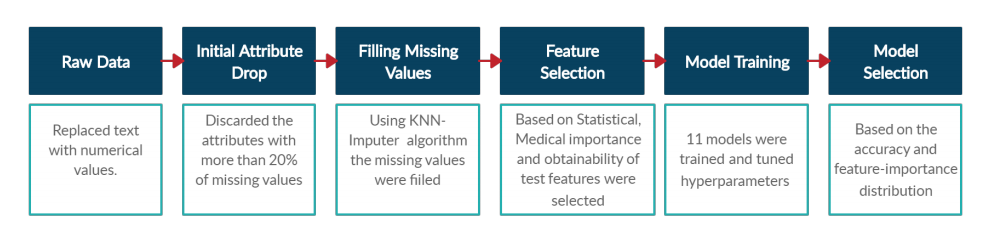

# Data set we contains

1. age - age
2. bp - blood pressure
3. sg - specific gravity
4. al - albumin
5. su - sugar
6. rbc - red blood cells
7. pc - pus cell
8. pcc - pus cell clumps
9. ba - bacteria
10. bgr - blood glucose random
11. bu - blood urea
12. sc - serum creatinine
13. sod - sodium
14. pot - potassium
15. hemo - haemoglobin
16. pcv - packed cell volume
17. wc - white blood cell count
18. rc - red blood cell count
19. htn - hypertension
20. dm - diabetes mellitus
21. cad - coronary artery disease
22. appet - appetite
23. pe - pedal edema
24. ane - anemia
25. lassification - class

# Feature description of the Data

1. Age(numerical) --> age in years
2. Blood Pressure(numerical) bp in mm/Hg
3. Specific Gravity(nominal) sg - (1.005,1.010,1.015,1.020,1.025)
4. Albumin(nominal)al - (0,1,2,3,4,5)
5. Sugar(nominal) su - (0,1,2,3,4,5)
6. Red Blood Cells(nominal) rbc - (normal,abnormal)
7. Pus Cell (nominal)pc - (normal,abnormal)
8. Pus Cell clumps(nominal)pcc - (present,notpresent)
9. Bacteria(nominal) ba - (present,notpresent)
10. Blood Glucose Random(numerical) bgr in mgs/dl
11. Blood Urea(numerical) bu in mgs/dl
12. Serum Creatinine(numerical) sc in mgs/dl
13. Sodium(numerical) sod in mEq/L
14. Potassium(numerical) pot in mEq/L
15. Haemoglobin(numerical) hemo in gms
16. Packed Cell Volume(numerical)
17. White Blood Cell Count(numerical) wc in cells/cumm
18. Red Blood Cell Count(numerical) rc in millions/cmm
19. Hypertension(nominal) htn - (yes,no)
20. Diabetes Mellitus(nominal) dm - (yes,no)
21. Coronary Artery Disease(nominal) cad - (yes,no)
22. Appetite(nominal) ppet - (good,poor)
23. Pedal Edema(nominal) pe - (yes,no)
24. Anemia(nominal)ane - (yes,no)
25. Class (nominal) class - (ckd,notckd)

## Install & Importing the Dependencies

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Extract the Data-Set ( Kidney_Disease.csv )

In [182]:
kidney=pd.read_csv(r'C:\kidney disease project\kidney_disease.csv')

In [183]:
kidney.shape

(400, 26)

- It Indicates there are about **400** Rows and **26** Columns are present in our Data Set

In [185]:
kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [186]:
kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [187]:
kidney.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


# Performing Exploitory Data Analysis ( EDA )
- Modifying the Column Names as per our requirements

In [189]:
columns=pd.read_csv(r"C:\Users\karth\Downloads\description.txt",sep='-')
columns=columns.reset_index()

In [190]:
columns.columns=['cols','abb_col_names']

In [191]:
columns

,cols,abb_col_names
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin
5,su,sugar
6,rbc,red blood cells
7,pc,pus cell
8,pcc,pus cell clumps
9,ba,bacteria


In [192]:
kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [193]:
kidney.columns=columns['abb_col_names'].values

In [194]:
kidney.head()

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [195]:
kidney.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
blood pressure,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
specific gravity,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
albumin,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
sugar,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
blood glucose random,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
blood urea,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
serum creatinine,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sodium,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


In [196]:
def convert_dtype(kidney,feature):
    kidney[feature]=pd.to_numeric(kidney[feature],errors='coerce')    #whereever we have Nan values , this errors parameter will hanfle that 

In [197]:
features=['packed cell volume','white blood cell count','red blood cell count']
for i in features:
    convert_dtype(kidney,i)

In [198]:
kidney.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume         float64
white blood cell count     float64
red blood cell count       float64
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [199]:
kidney.drop('id',inplace=True,axis=1)

# Performing Data cleaning

In [201]:
def extract_cat_num(kidney):
    cat_col=[col for col in kidney.columns if kidney[col].dtype=='O']
    num_col=[col for col in kidney.columns if kidney[col].dtype!='O']
    return cat_col,num_col

In [202]:
cat_col,num_col=extract_cat_num(kidney)

In [203]:
cat_col

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [204]:
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

In [205]:
# dirtiness in categorical data
for col in cat_col:
    print('{} has {} values'.format(col,kidney[col].unique()))
    print("\n")

red blood cells has [nan 'normal' 'abnormal'] values


 pus cell has ['normal' 'abnormal' nan] values


pus cell clumps has ['notpresent' 'present' nan] values


bacteria has ['notpresent' 'present' nan] values


ypertension has ['yes' 'no' nan] values


diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values


coronary artery disease has ['no' 'yes' '\tno' nan] values


appetite has ['good' 'poor' nan] values


pedal edema has ['no' 'yes' nan] values


anemia has ['no' 'yes' nan] values


class has ['ckd' 'ckd\t' 'notckd'] values




In [206]:
kidney['diabetes mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes'},inplace=True)
kidney['coronary artery disease'].replace(to_replace={'\tno':'no'},inplace=True)
kidney['class'].replace(to_replace={'ckd\t':'ckd'},inplace=True)

In [207]:
# no dirtiness
for col in cat_col:
    print('{} has {} values'.format(col,kidney[col].unique()))
    print("\n")

red blood cells has [nan 'normal' 'abnormal'] values


 pus cell has ['normal' 'abnormal' nan] values


pus cell clumps has ['notpresent' 'present' nan] values


bacteria has ['notpresent' 'present' nan] values


ypertension has ['yes' 'no' nan] values


diabetes mellitus has ['yes' 'no' ' yes' nan] values


coronary artery disease has ['no' 'yes' nan] values


appetite has ['good' 'poor' nan] values


pedal edema has ['no' 'yes' nan] values


anemia has ['no' 'yes' nan] values


class has ['ckd' 'notckd'] values




## Analysing distribution of each and every column

In [209]:
len(num_col)

14

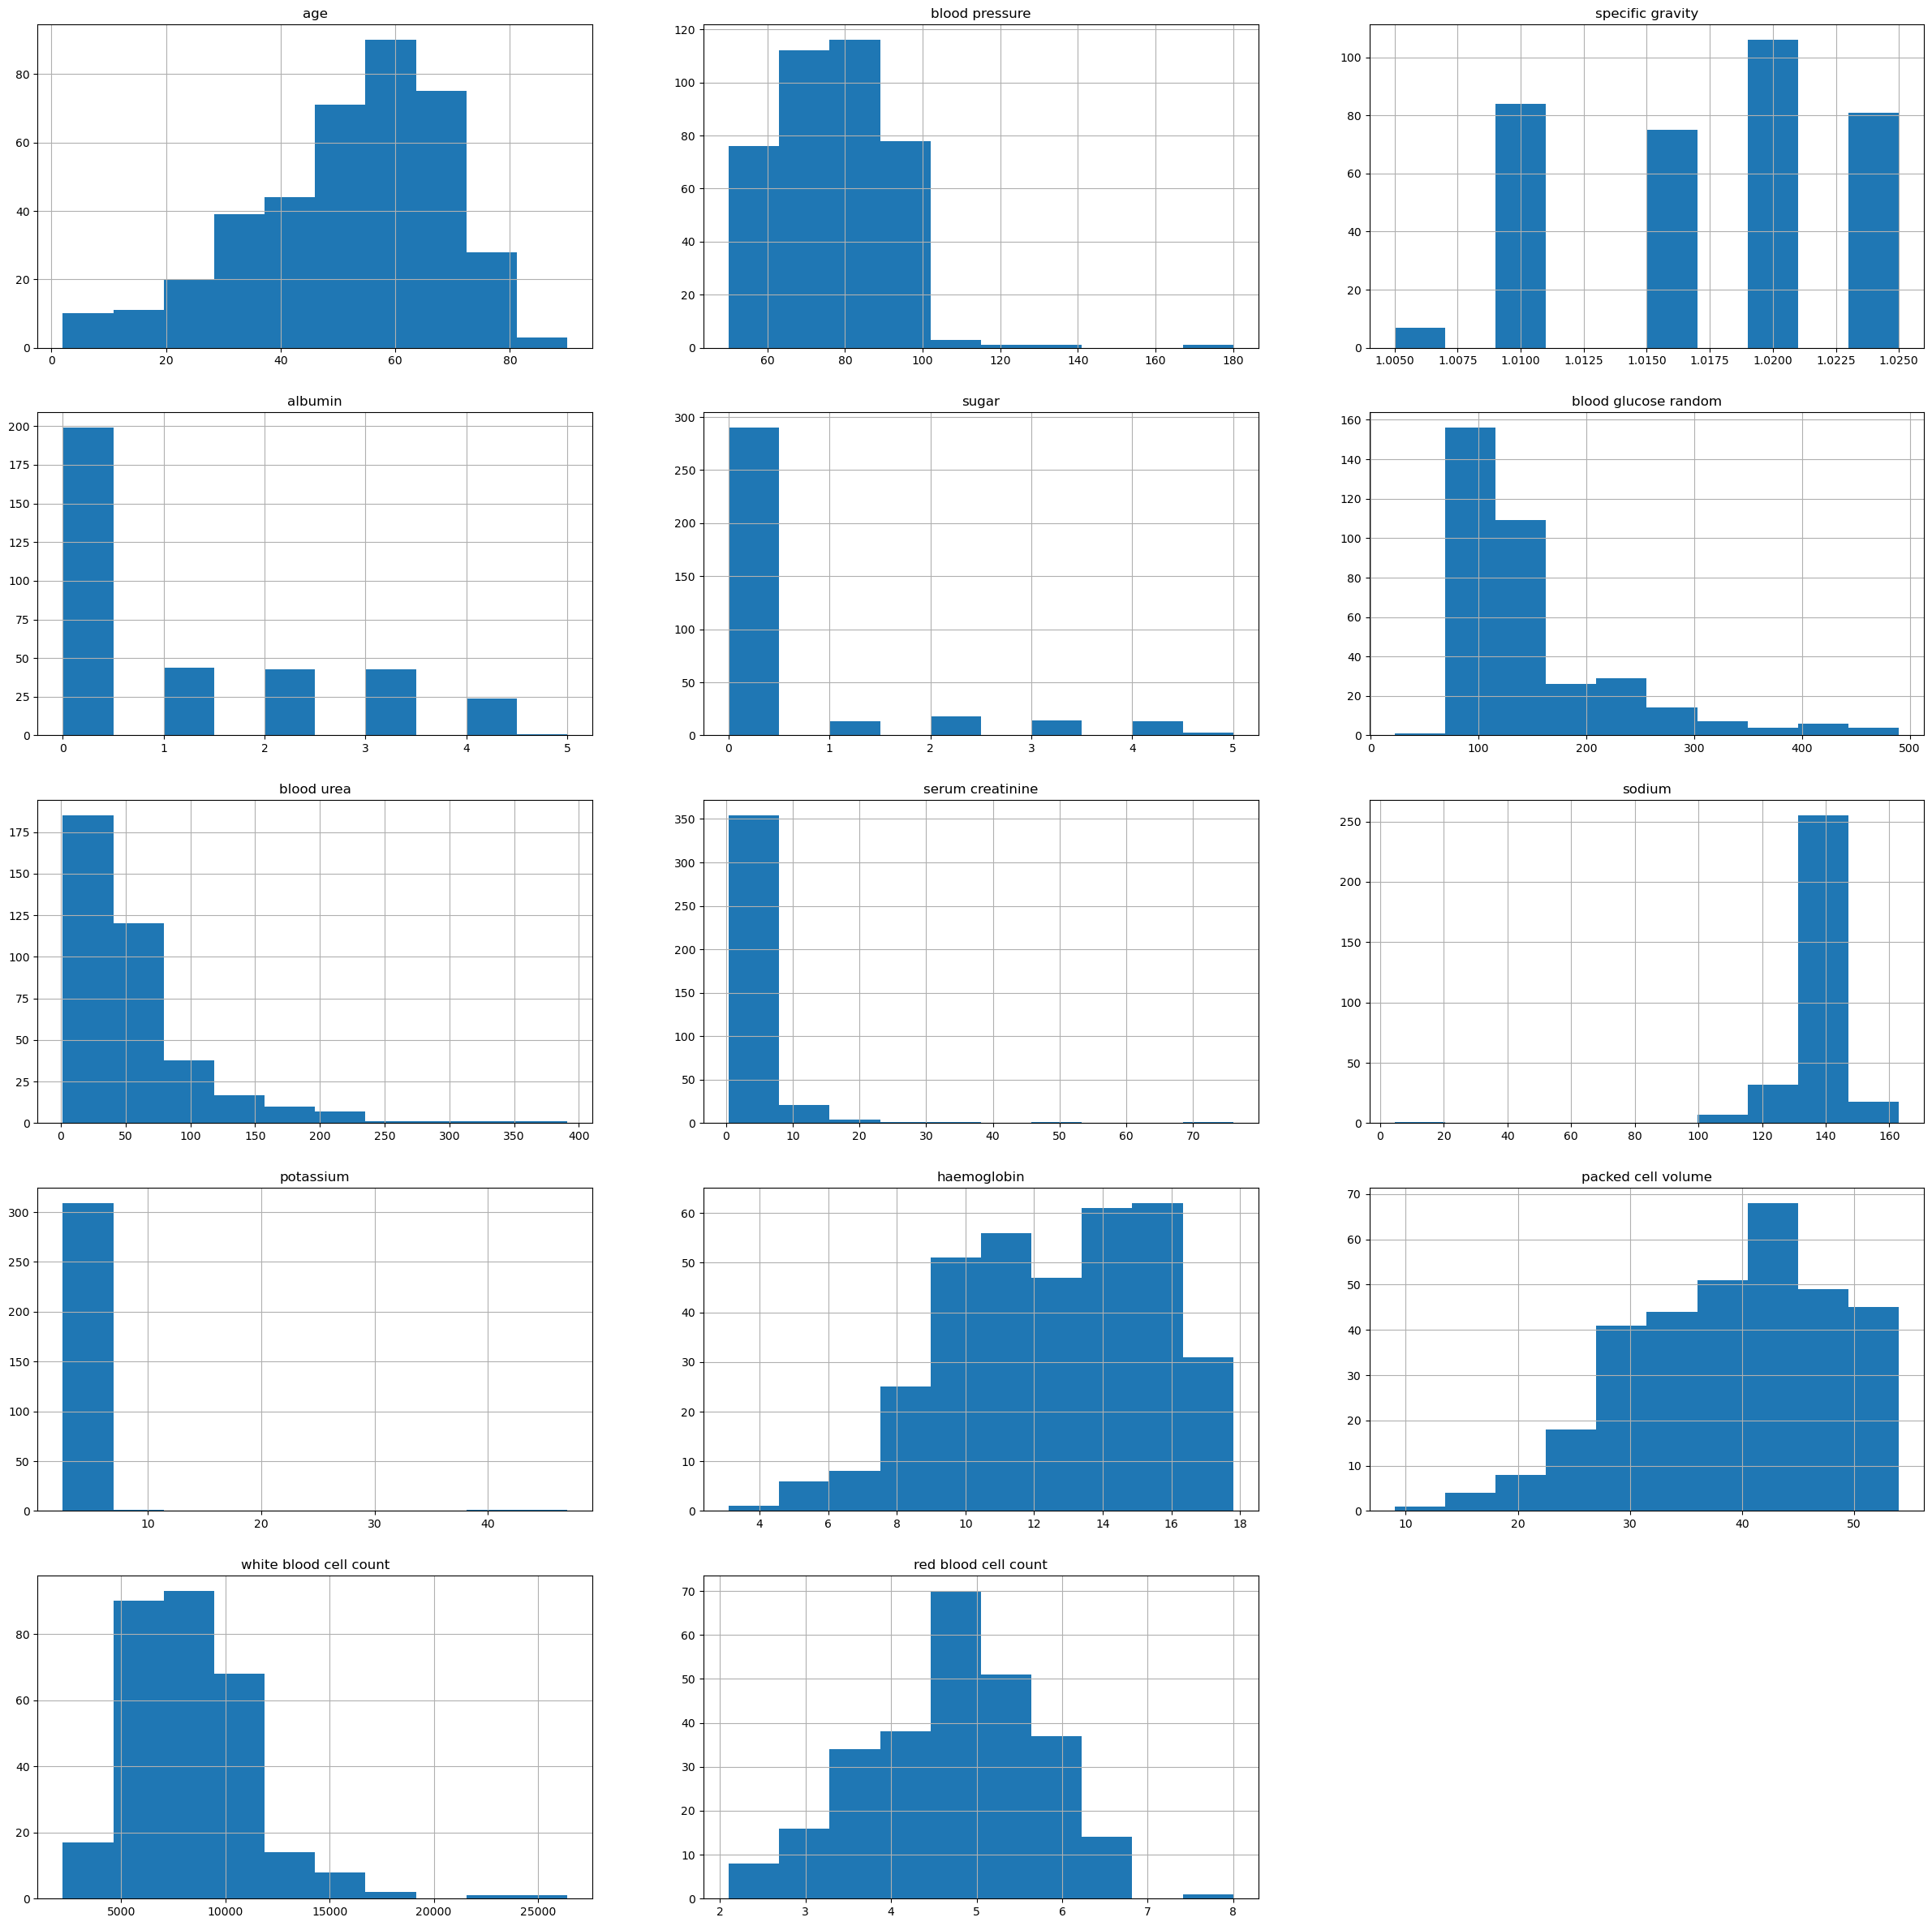

In [210]:
plt.figure(figsize=(30,30))
for i,feature in enumerate(num_col):
    plt.subplot(5,3,i+1)   # 5 rows and 3 columns        
    kidney[feature].hist()
    plt.title(feature)

## Check Label distribution of categorical Data

In [212]:
len(cat_col)

11

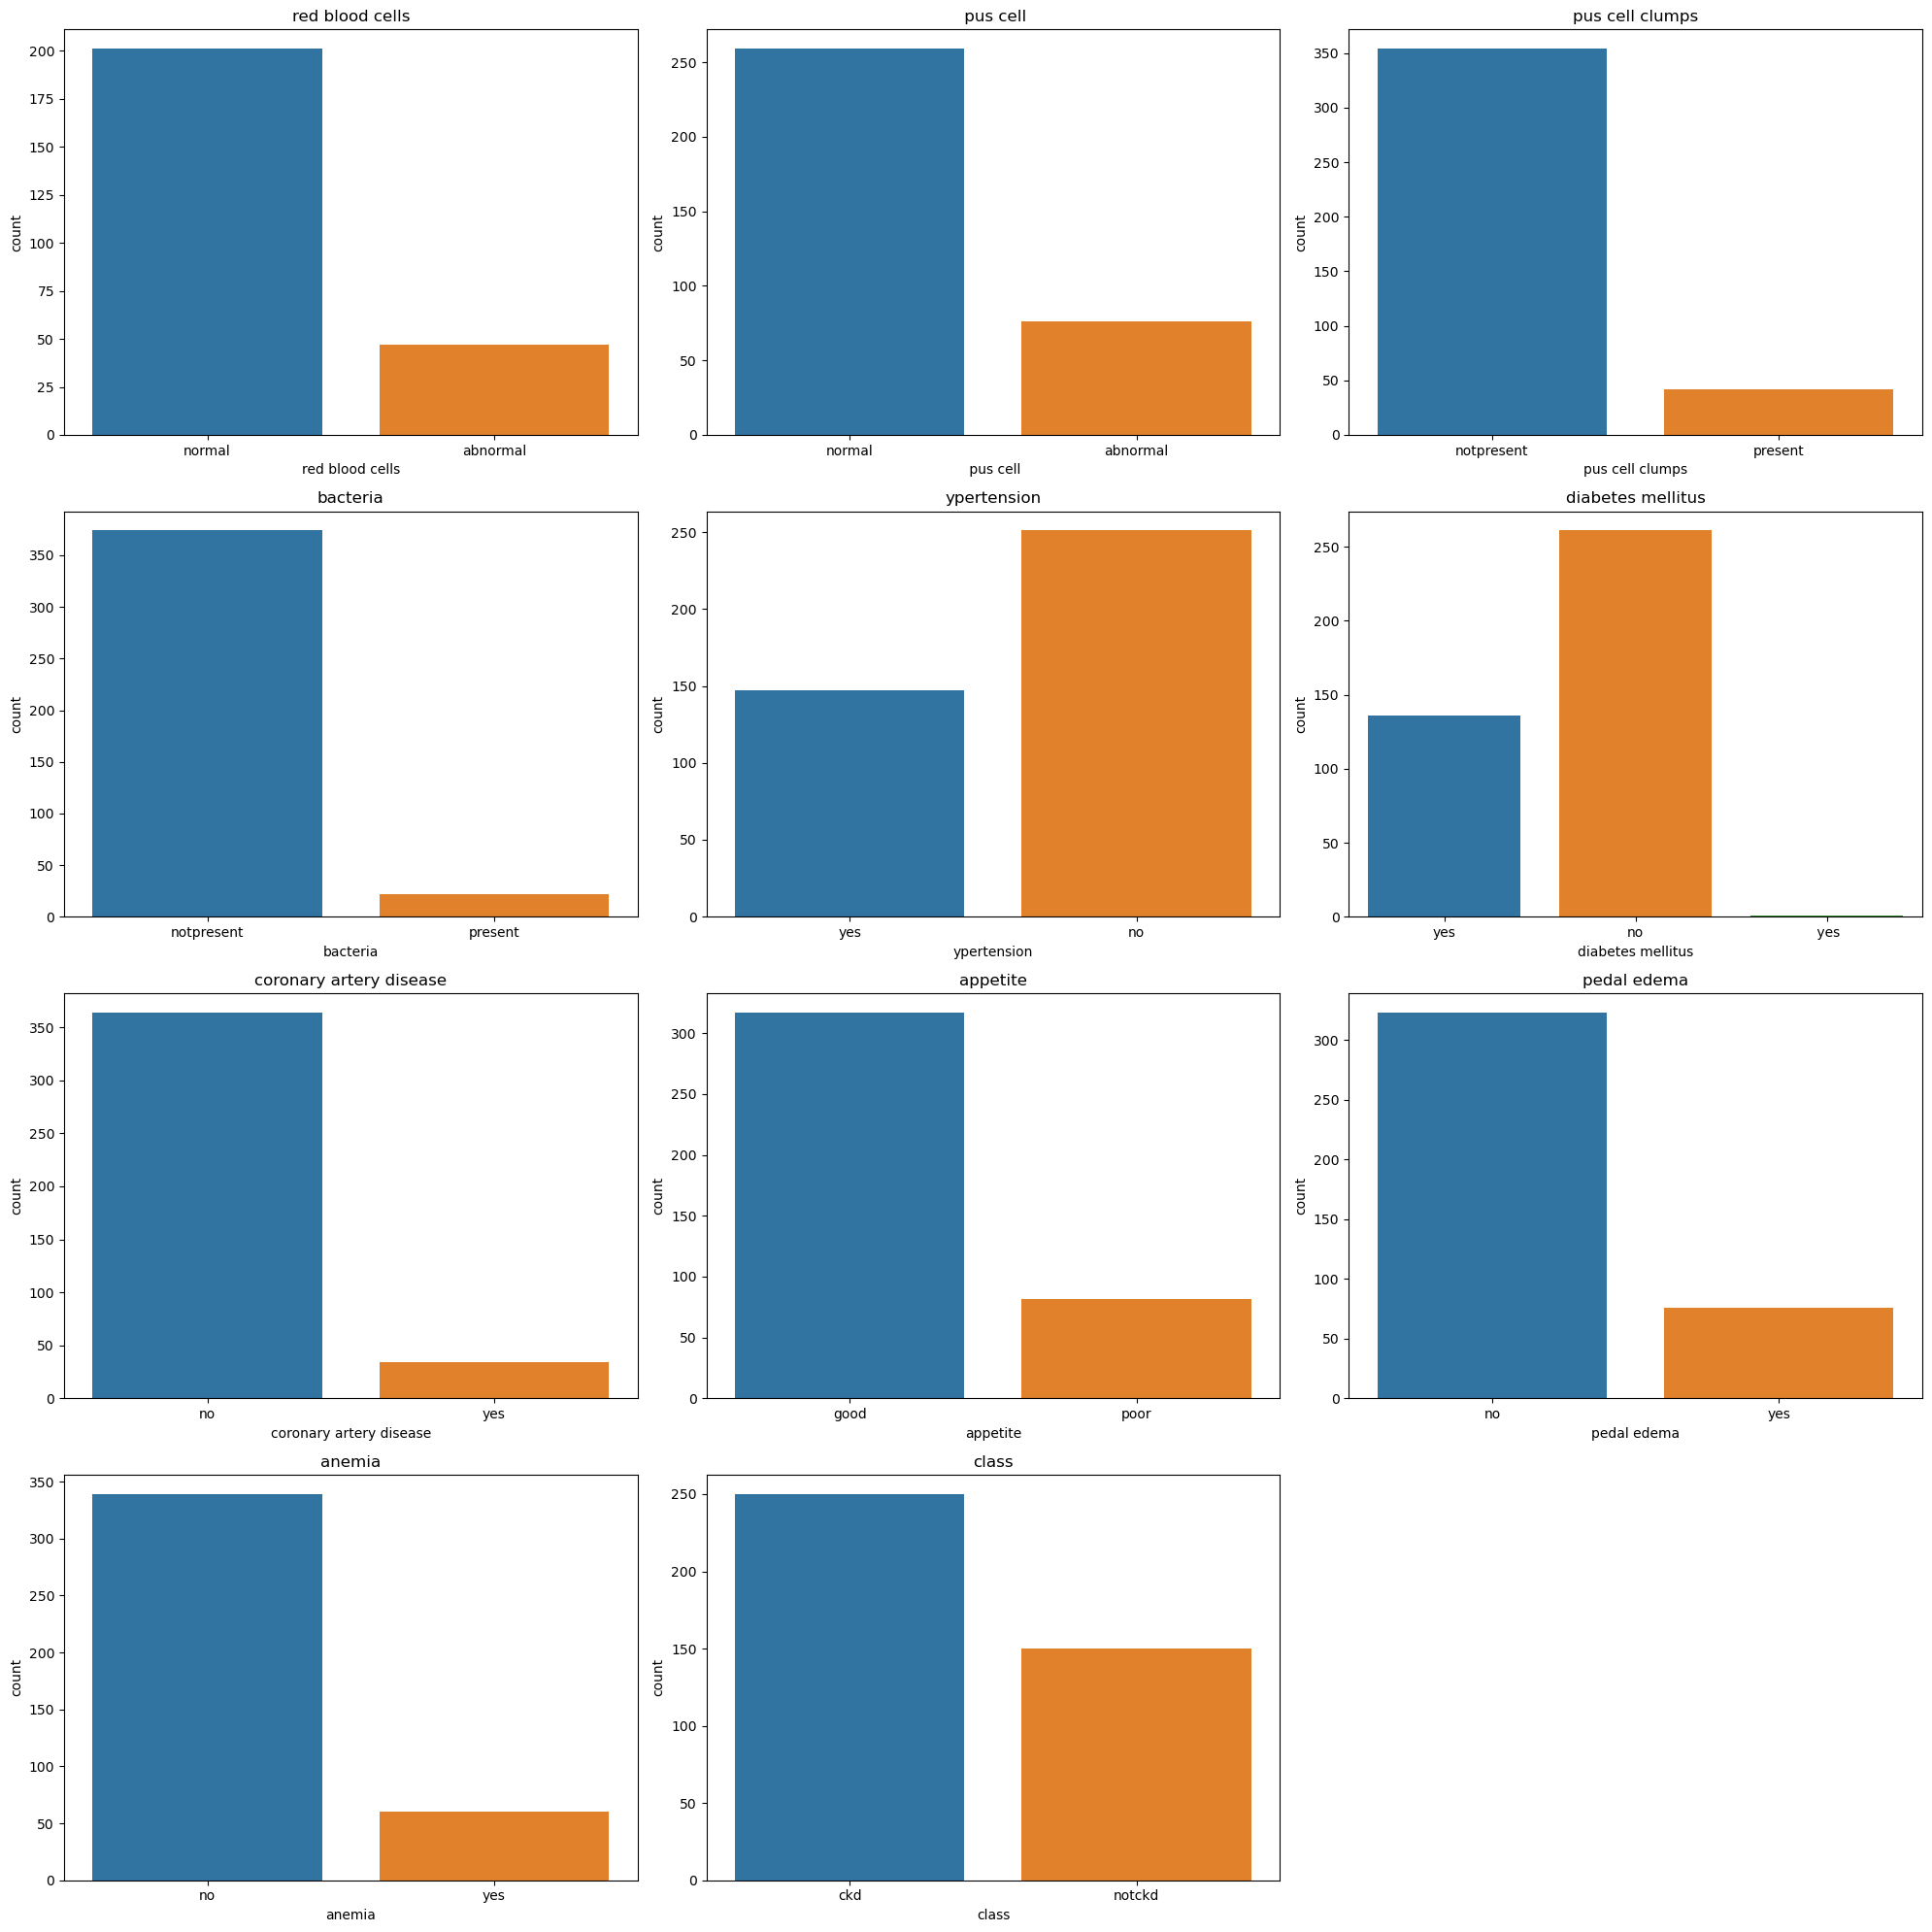

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

# Loop over categorical columns to create count plots
for i, feature in enumerate(cat_col):
    plt.subplot(4, 3, i + 1)
    sns.countplot(x=feature, data=kidney)  # Use x=feature and data=kidney to specify the data correctly
    plt.title(feature)

plt.tight_layout()
plt.show()


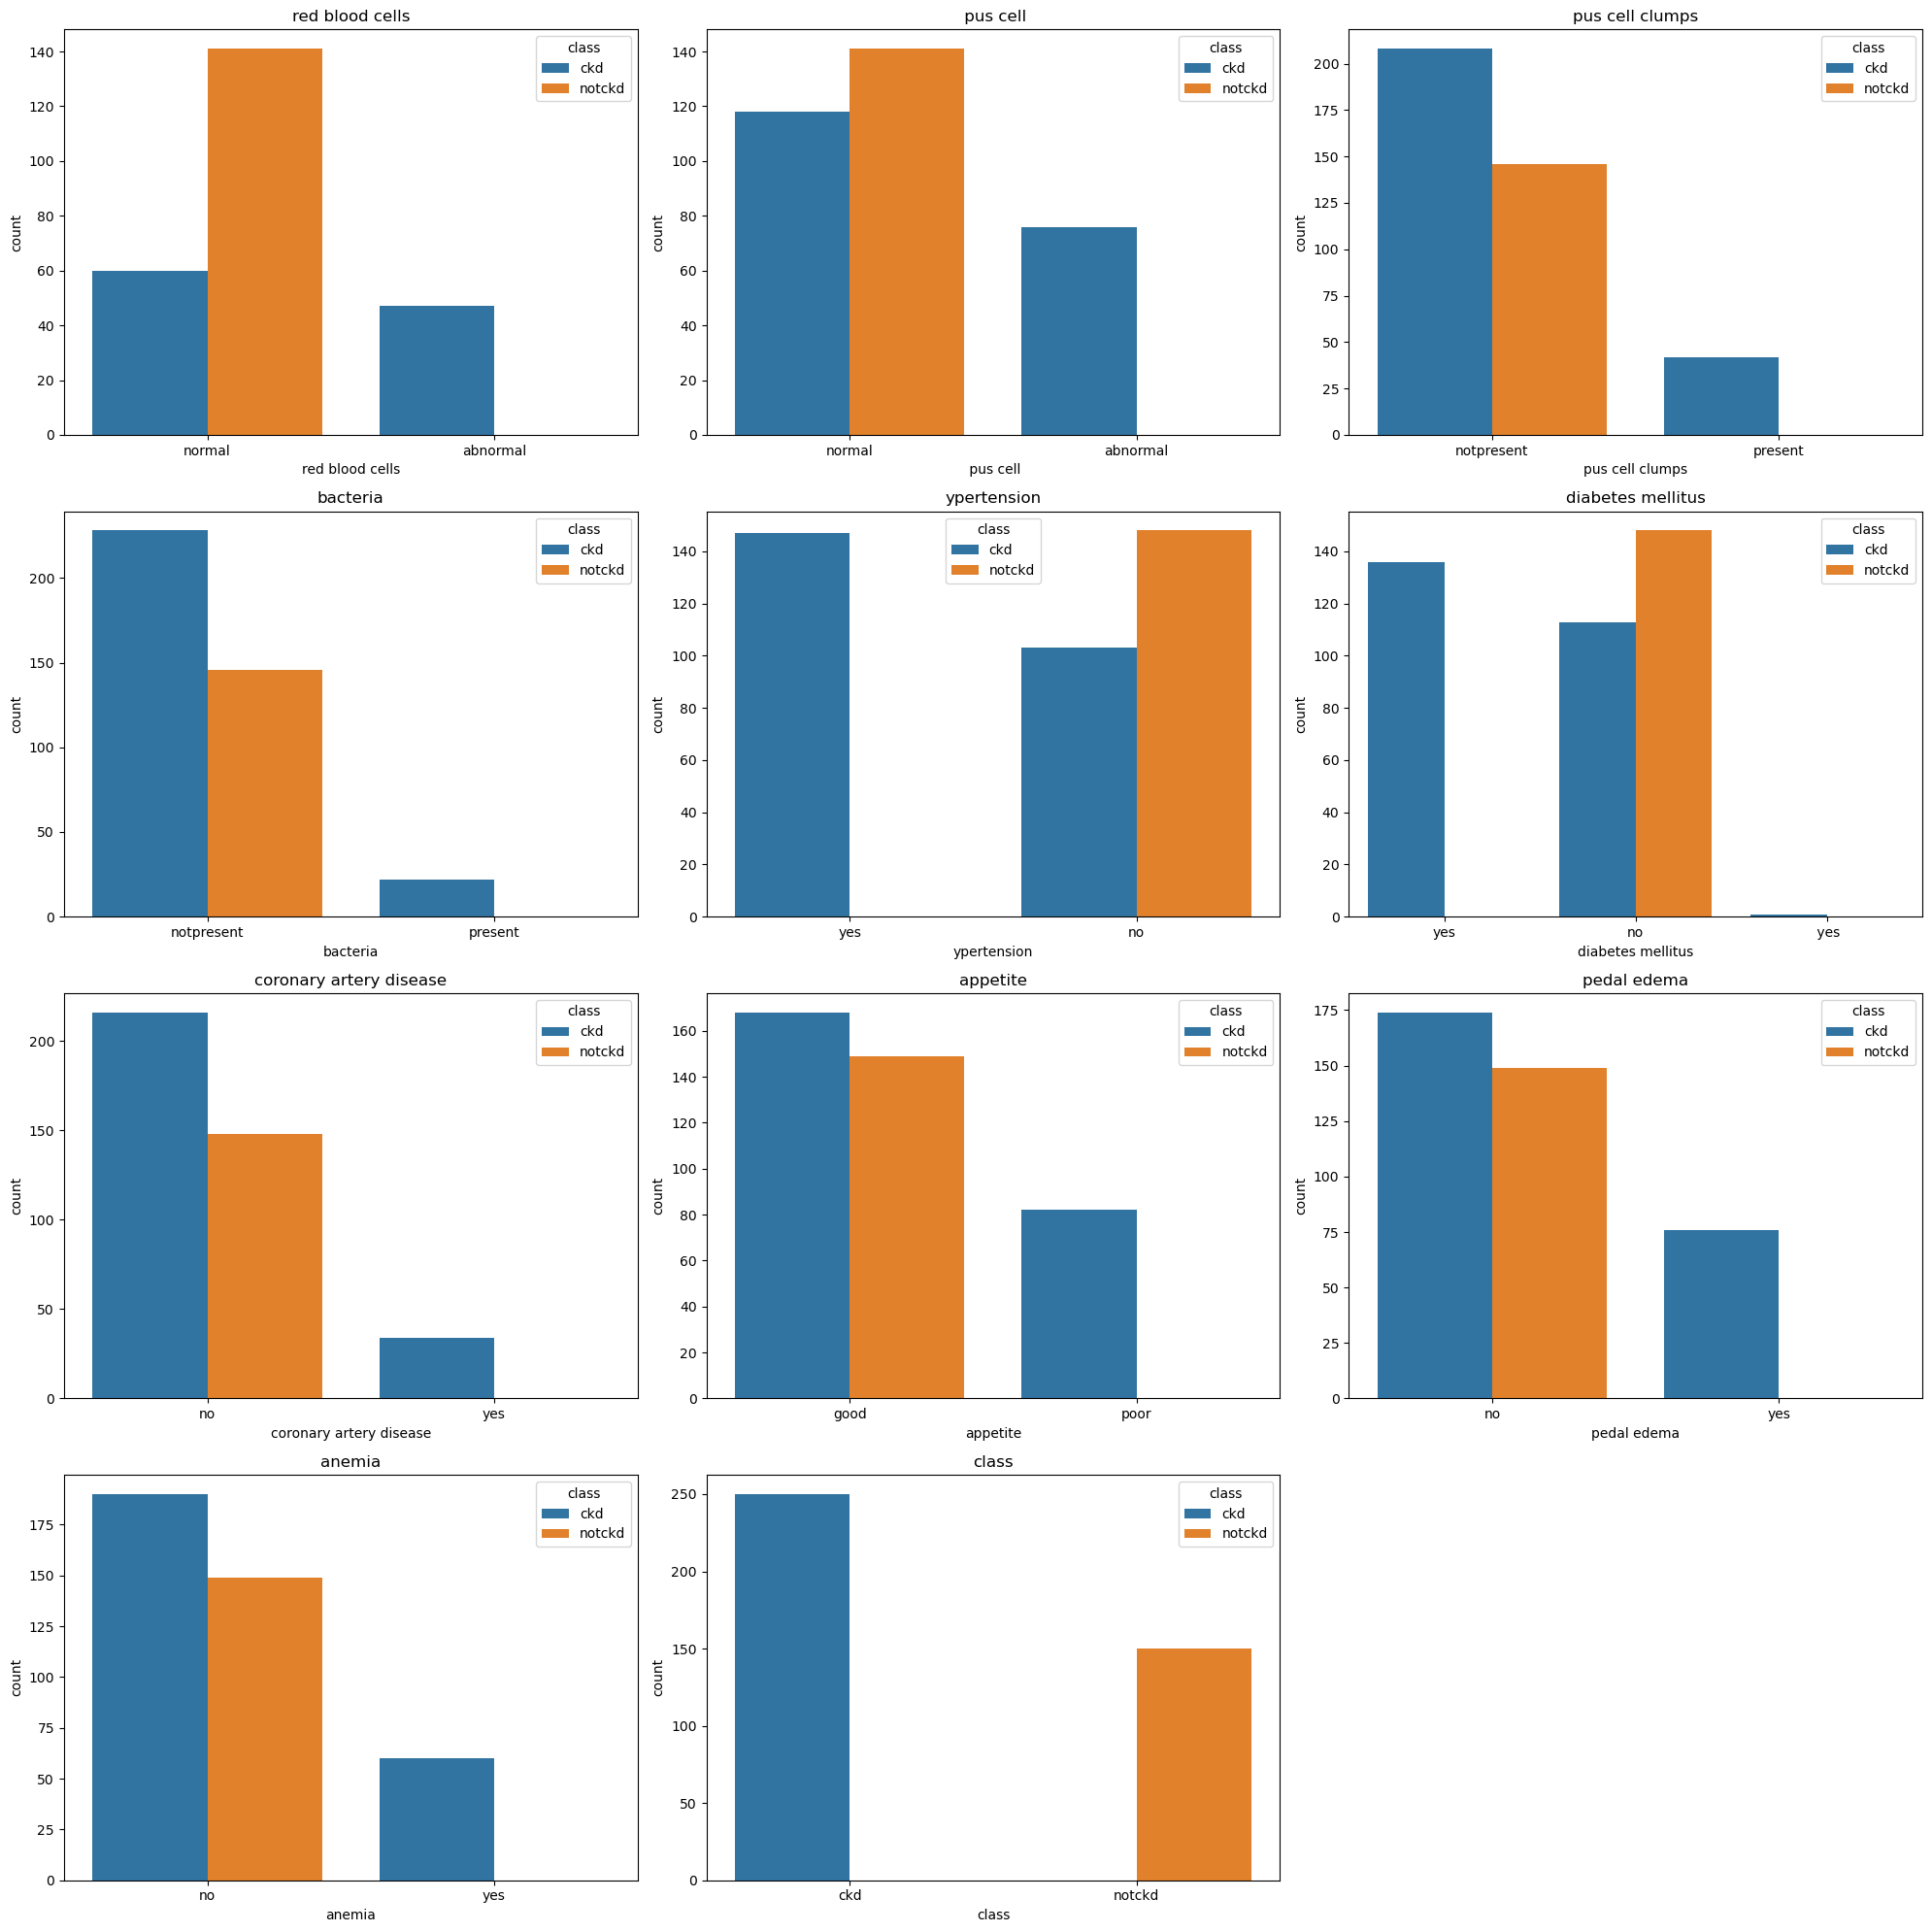

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

for i, feature in enumerate(cat_col):
    plt.subplot(4, 3, i + 1)
    sns.countplot(x=feature, data=kidney, hue='class')  # Specify x=feature and data=kidney with hue='class'
    plt.title(feature)

plt.tight_layout()
plt.show()


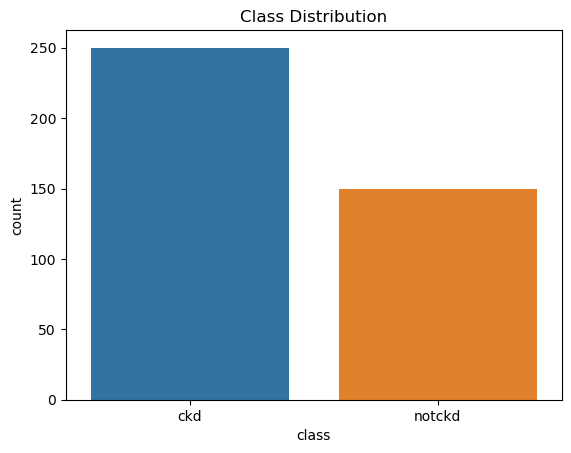

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='class', data=kidney)
plt.title('Class Distribution')
plt.show()

## Correlation between features

In [217]:
# Convert categorical columns to numerical using one-hot encoding
encoded_kidney = pd.get_dummies(kidney, drop_first=True)

# Compute the correlation matrix on the encoded data
correlation_matrix = encoded_kidney.corr()

# Display the correlation matrix
print(correlation_matrix)


                                  age  blood pressure  specific gravity  \
age                          1.000000        0.159480         -0.191096   
blood pressure               0.159480        1.000000         -0.218836   
specific gravity            -0.191096       -0.218836          1.000000   
albumin                      0.122091        0.160689         -0.469760   
sugar                        0.220866        0.222576         -0.296234   
blood glucose random         0.244992        0.160193         -0.374710   
blood urea                   0.196985        0.188517         -0.314295   
serum creatinine             0.132531        0.146222         -0.361473   
sodium                      -0.100046       -0.116422          0.412190   
potassium                    0.058377        0.075151         -0.072787   
haemoglobin                 -0.192928       -0.306540          0.602582   
packed cell volume          -0.242119       -0.326319          0.603560   
white blood cell count   

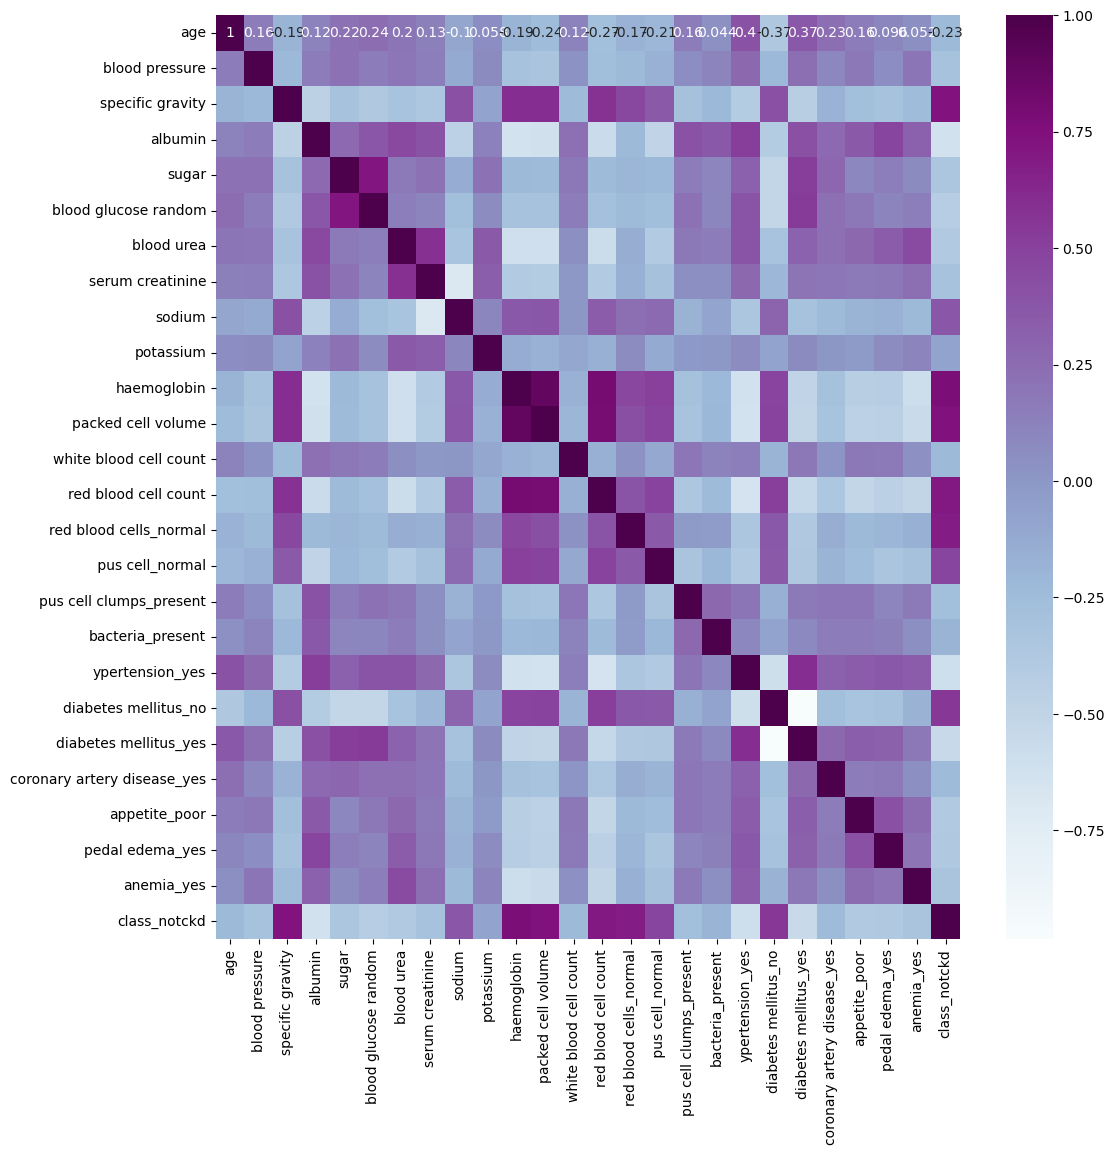

In [218]:
# Convert categorical columns to numeric using one-hot encoding
encoded_kidney = pd.get_dummies(kidney, drop_first=True)
# Plot heatmap for the encoded data
plt.figure(figsize=(12, 12))
sns.heatmap(encoded_kidney.corr(method='pearson'), cbar=True, cmap='BuPu', annot=True)
plt.show()


* Rbc count is positively correlated with specific gravity,haemoglobin,packed cell volume
* Rbc count is negatively correlated with albumin, blood urea
* Packed cell volume and haemoglobin are highly positive correlated
* Packed cell volume is negatively correlated with albumin and blood urea
* haemoglobin and albumin are negatively correlated

In [220]:
kidney.groupby(['red blood cells','class'])['red blood cell count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
red blood cells class                                    
abnormal        ckd        25  3.832000     3.7  2.5  5.6
normal          ckd        40  3.782500     3.8  2.1  8.0
                notckd    134  5.368657     5.3  4.4  6.5

We can observe that when a person is not diseased its rbc count is 134, mean is also high whereas when he is diseased count drop downs to 25-40 and mean is low.

#### Relationship between haemoglobin and packed cell volume

In [223]:
!pip install plotly

In [224]:
import plotly.express as px

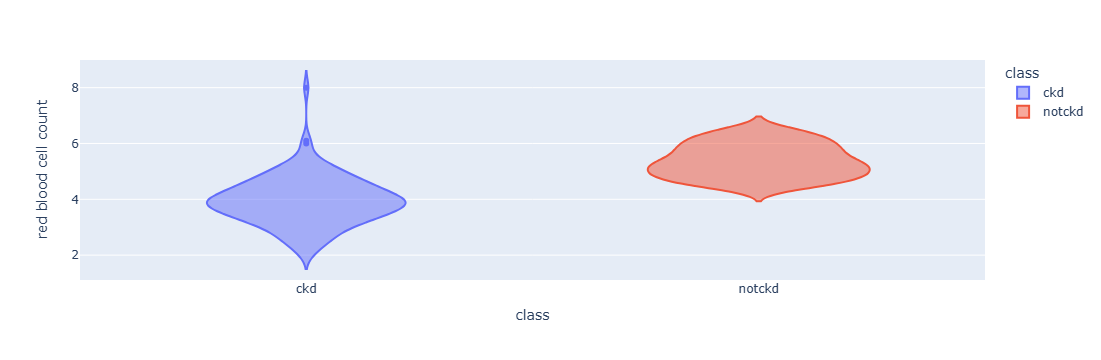

In [225]:
px.violin( kidney ,y='red blood cell count', x='class', color='class')

Text(0.5, 1.0, 'Relationship between haemoglobin and packed cell volume')

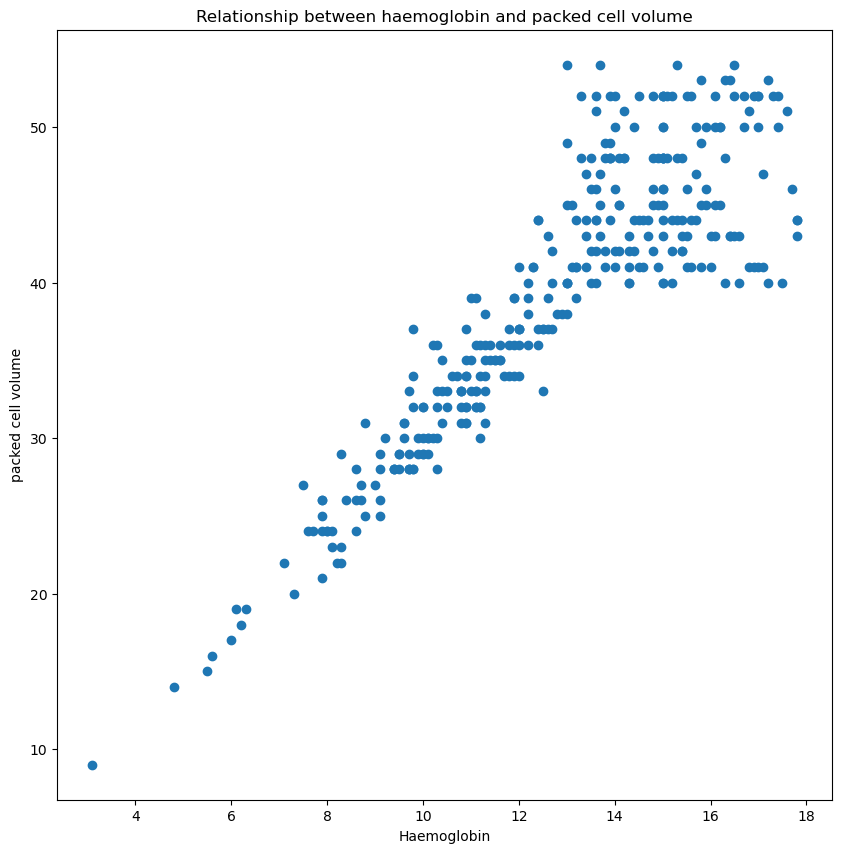

In [226]:
plt.figure(figsize=(10,10))
plt.scatter(x=kidney.haemoglobin,y=kidney['packed cell volume'])
plt.xlabel('Haemoglobin')
plt.ylabel('packed cell volume')
plt.title('Relationship between haemoglobin and packed cell volume')


We can see that there is a linear relationship between haemoglobin and pacled cell volume

### Analyse distribution of red blood cell count chronic as well as non chronic

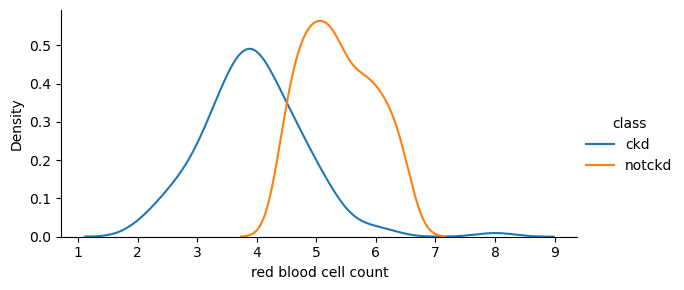

In [229]:
grid=sns.FacetGrid(kidney,hue='class',aspect=2)
grid.map(sns.kdeplot,'red blood cell count')
grid.add_legend()

from above visuals we can say that person with lower rbc count have high chances of having chronic disease

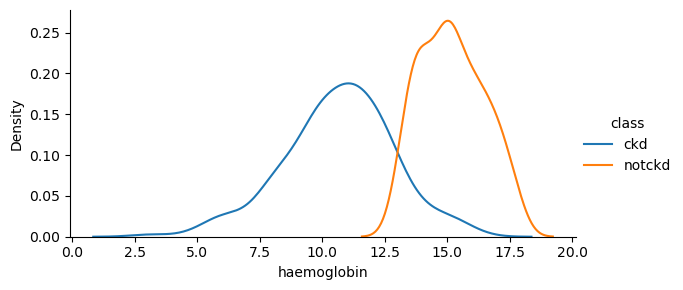

In [231]:
grid=sns.FacetGrid(kidney,hue='class',aspect=2)
grid.map(sns.kdeplot,'haemoglobin')
grid.add_legend()

Alternatively to avoid the reusage of multiple lines of codes we create functions and definition calls thus enhancing efficiency 

In [233]:
def violin(col):
    fig = px.violin(kidney,y=col,x='class',color='class',box=True)
    return fig.show()

In [234]:
def scatters(col1,col2):
    fig = px.scatter(kidney,x=col1,y=col2,color='class')
    return fig.show()
    

In [235]:
def kde_plot(feature):
    grid=sns.FacetGrid(kidney,hue='class',aspect=2)
    grid.map(sns.kdeplot,feature)
    grid.add_legend()
    

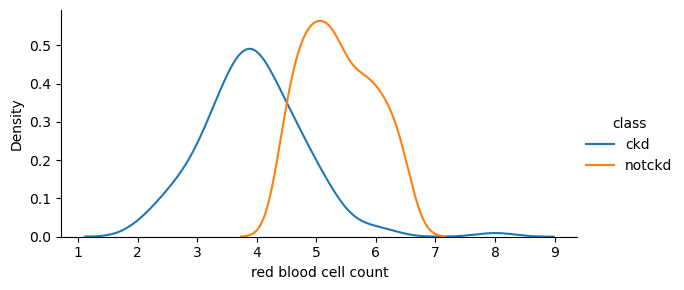

In [236]:
kde_plot('red blood cell count')

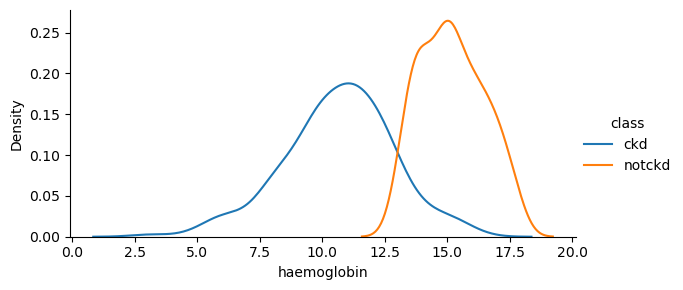

In [237]:
kde_plot('haemoglobin')

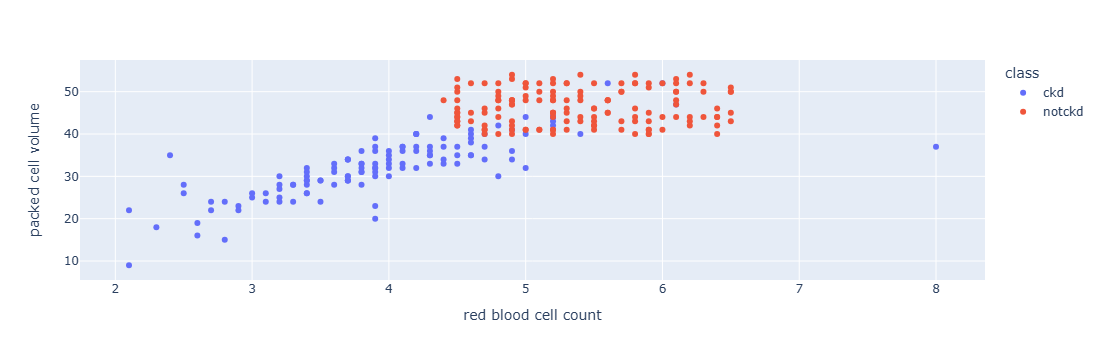

In [238]:
scatters('red blood cell count','packed cell volume')

Text(0.5, 1.0, 'Relationship between red blood cell count and packed cell volume')

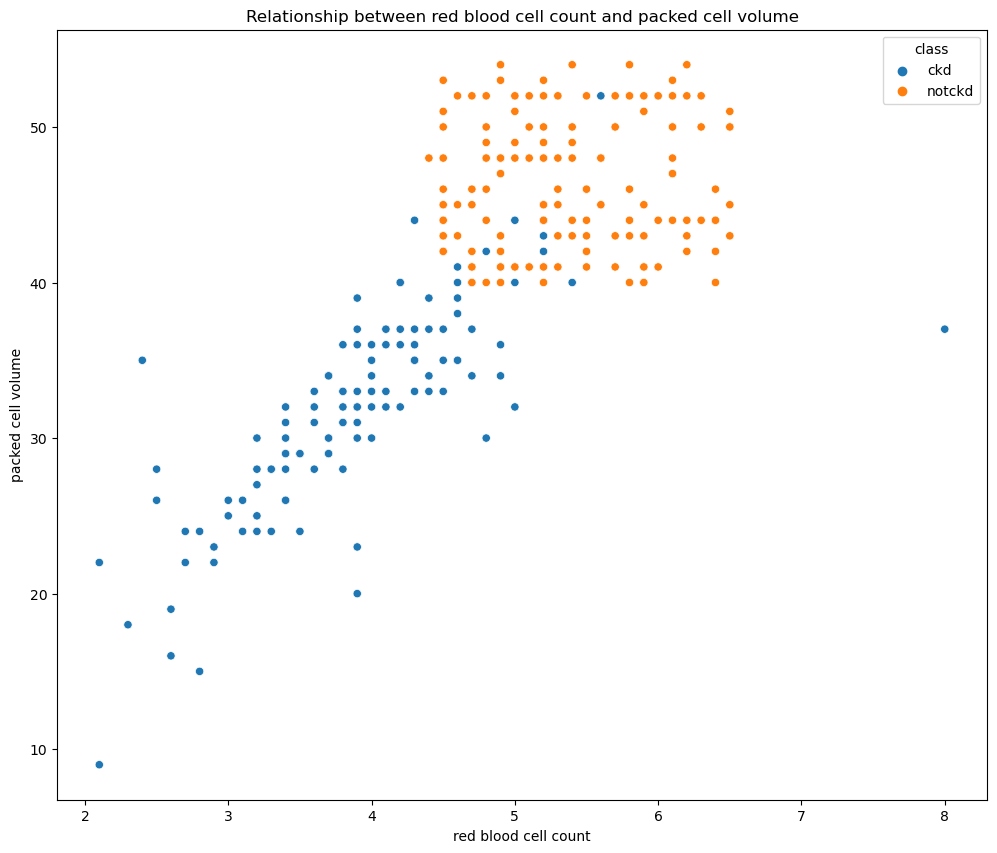

In [239]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=kidney['red blood cell count'],y=kidney['packed cell volume'],hue=kidney['class'])
plt.xlabel('red blood cell count')
plt.ylabel('packed cell volume')
plt.title('Relationship between red blood cell count and packed cell volume')


Text(0.5, 1.0, 'Relationship between haemoglobin and red blood cell count')

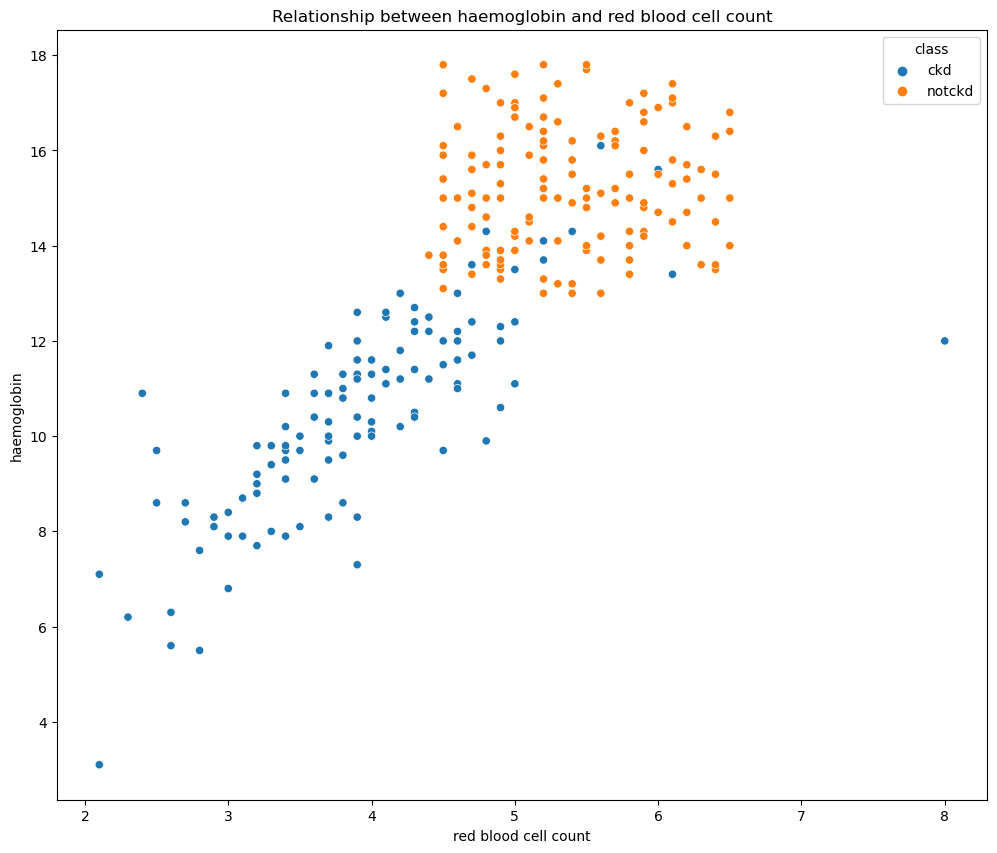

In [240]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=kidney['red blood cell count'],y=kidney['haemoglobin'],hue=kidney['class'])
plt.xlabel('red blood cell count')
plt.ylabel('haemoglobin')
plt.title('Relationship between haemoglobin and red blood cell count')

* We can see that there is some kind of linearity in all the relationships
* Whenever haemoglobin is below 13-14 he is positive for chronic disease , Whenever haemoglobin is near 18 he is negative

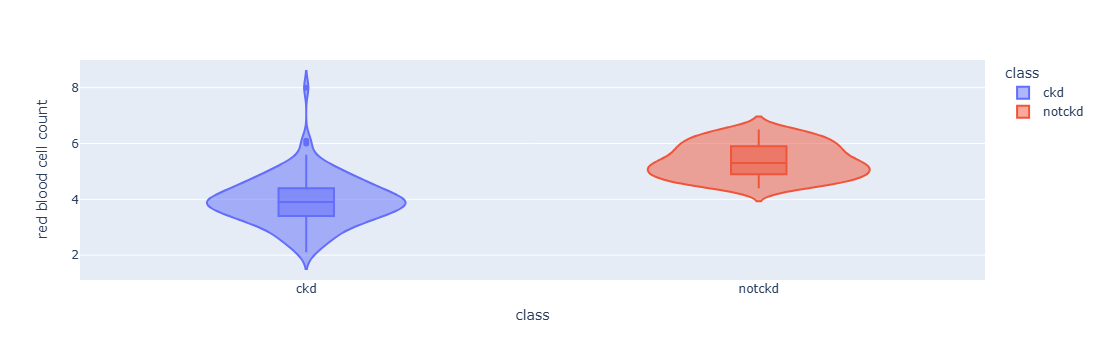

In [242]:
violin('red blood cell count')

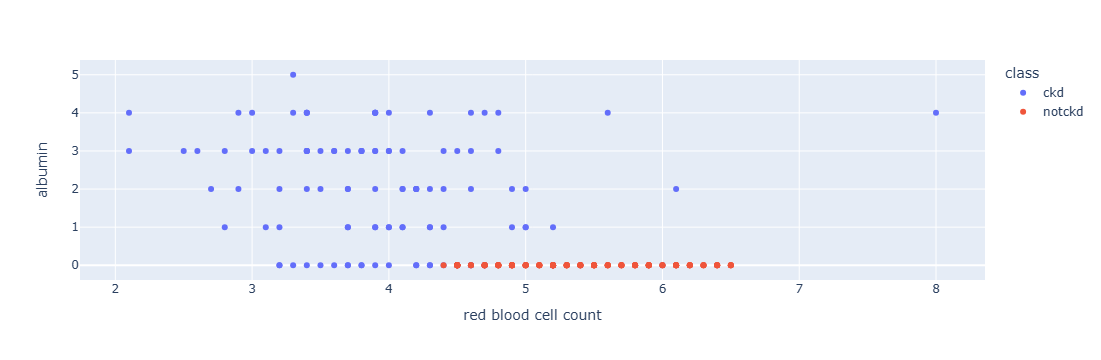

In [243]:
scatters('red blood cell count','albumin')

## Handling Missing Values

In [245]:
kidney.isnull().sum()

age                          9
blood pressure              12
specific gravity            47
albumin                     46
sugar                       49
red blood cells            152
 pus cell                   65
pus cell clumps              4
bacteria                     4
blood glucose random        44
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed cell volume          71
white blood cell count     106
red blood cell count       131
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [246]:
kidney.isnull().sum().sort_values(ascending=False)

red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
 pus cell                   65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

We can fill this missing values with mean,median or std deviat

<Axes: xlabel='class', ylabel='age'>

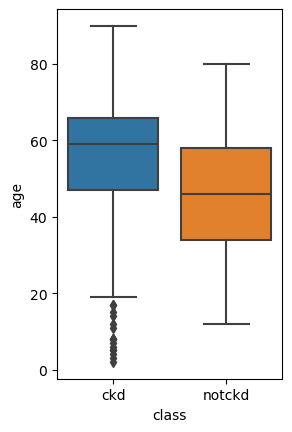

In [248]:
plt.subplot(1,2,1)
sns.boxplot(x=kidney['class'],y=kidney['age'])

In [249]:
list(enumerate(cat_col))

[(0, 'red blood cells'),
 (1, ' pus cell'),
 (2, 'pus cell clumps'),
 (3, 'bacteria'),
 (4, 'ypertension'),
 (5, 'diabetes mellitus'),
 (6, 'coronary artery disease'),
 (7, 'appetite'),
 (8, 'pedal edema'),
 (9, 'anemia'),
 (10, 'class')]

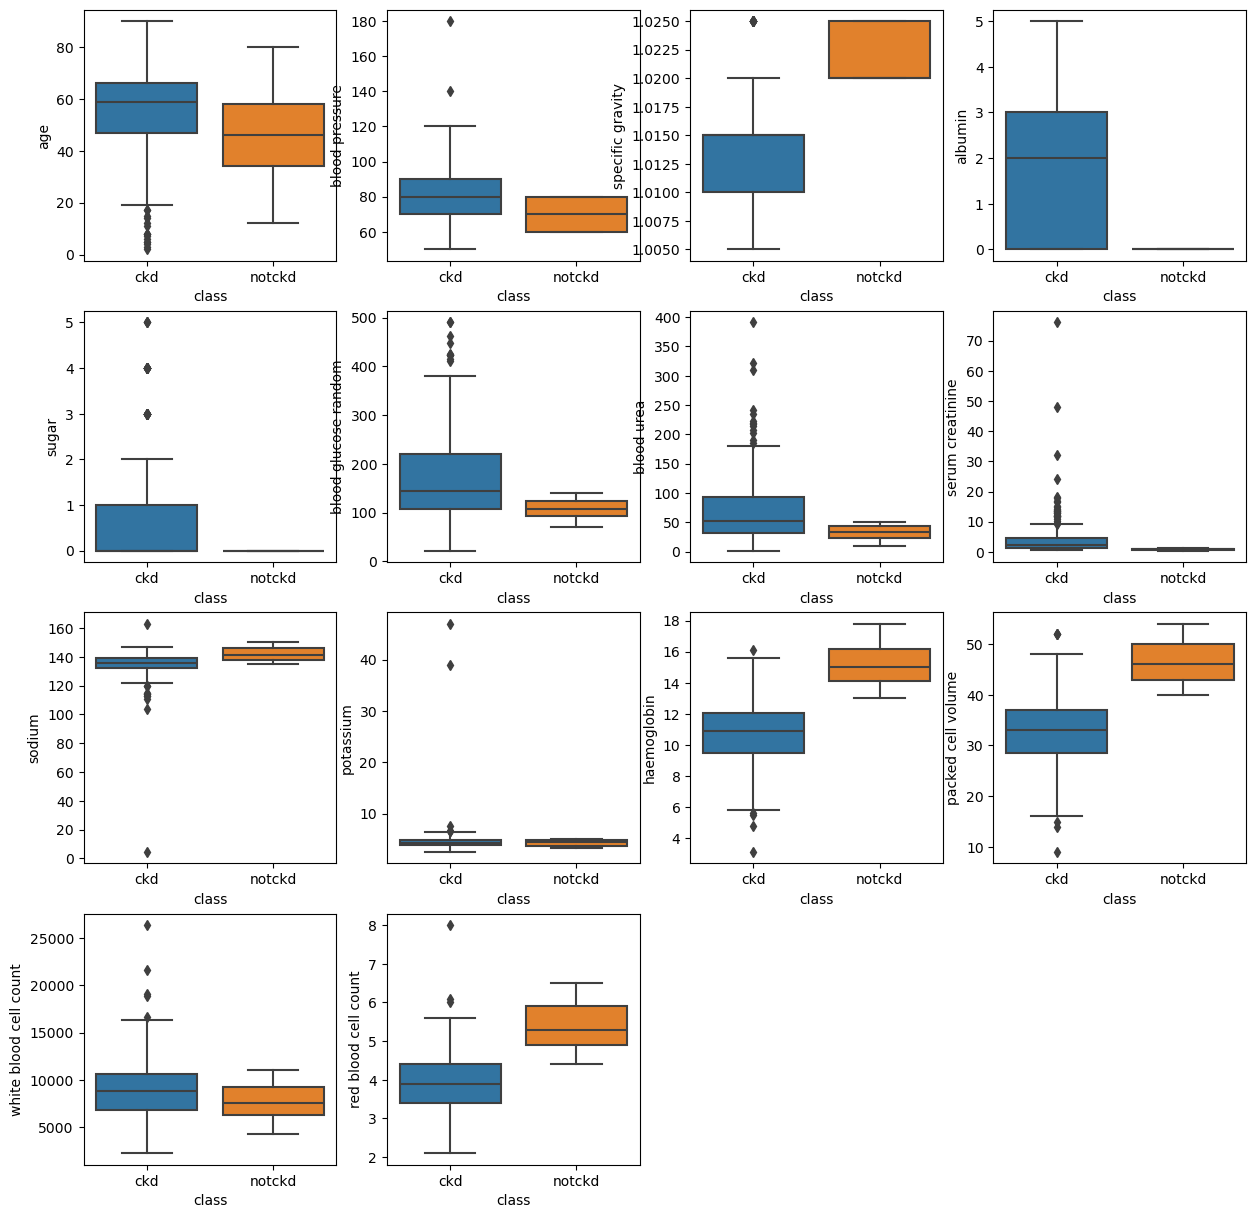

In [250]:
plt.figure(figsize=(15,15))
for i in enumerate(num_col):
    plt.subplot(4,4,i[0]+1)
    sns.boxplot(x=kidney['class'],y=i[1],data=kidney.reset_index())

there are outliers in dataset so filling missing values with mean is not feasible , i will use median to fill missing values

In [252]:
numeric_mean = np.mean(kidney.select_dtypes(include=['number']))
print(numeric_mean)

551.7923672749896


In [253]:
kidney.isnull().sum()

age                          9
blood pressure              12
specific gravity            47
albumin                     46
sugar                       49
red blood cells            152
 pus cell                   65
pus cell clumps              4
bacteria                     4
blood glucose random        44
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed cell volume          71
white blood cell count     106
red blood cell count       131
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [254]:
for i in num_col:
    kidney[i].fillna(kidney[i].median(),inplace=True)

In [255]:
kidney.isnull().sum()

age                          0
blood pressure               0
specific gravity             0
albumin                      0
sugar                        0
red blood cells            152
 pus cell                   65
pus cell clumps              4
bacteria                     4
blood glucose random         0
blood urea                   0
serum creatinine             0
sodium                       0
potassium                    0
haemoglobin                  0
packed cell volume           0
white blood cell count       0
red blood cell count         0
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [256]:
kidney.describe()

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000
mean,51.562500,76.575000,1.017712,0.90000,0.395000,145.062500,56.693000,2.997125,137.631250,4.577250,12.54250,39.082500,8298.500000,4.737750
std,16.982996,13.489785,0.005434,1.31313,1.040038,75.260774,49.395258,5.628886,9.206332,2.821357,2.71649,8.162245,2529.593814,0.841439
min,2.000000,50.000000,1.005000,0.00000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.10000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.87500,34.000000,6975.000000,4.500000
50%,55.000000,80.000000,1.020000,0.00000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.65000,40.000000,8000.000000,4.800000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,150.000000,61.750000,2.725000,141.000000,4.800000,14.62500,44.000000,9400.000000,5.100000
max,90.000000,180.000000,1.025000,5.00000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.80000,54.000000,26400.000000,8.000000


## Filling missing values in categorical columns using random values

It was more important to find the missing values and need to clean thos emissing values by using different menthods. ( I've dropped the NULL Values ). Missing Values leads to False Output and sometimes cause many Problems while Evaluating our Model.

![image](https://datascience.foundation/backend/web/uploads/blog/missing-data09-28-2017_015846.jpg)

In [258]:
kidney['red blood cells'].isnull().sum()

152

In [259]:
random_sample=kidney['red blood cells'].dropna().sample(152)

In [260]:
random_sample

315      normal
348      normal
2        normal
14       normal
48       normal
         ...   
339      normal
213      normal
296      normal
273      normal
76     abnormal
Name: red blood cells, Length: 152, dtype: object

In [261]:
kidney[kidney['red blood cells'].isnull()].index

Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
       ...
       245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
      dtype='int64', length=152)

In [262]:
random_sample.index

Index([315, 348,   2,  14,  48, 150, 252, 329, 376, 375,
       ...
        49,  27, 155, 382, 181, 339, 213, 296, 273,  76],
      dtype='int64', length=152)

We can see that indexes are different , while putting random values indexes must be equal

In [264]:
random_sample.index=kidney[kidney['red blood cells'].isnull()].index    #in this way index will be equal

In [265]:
random_sample.index

Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
       ...
       245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
      dtype='int64', length=152)

In [266]:
kidney.loc[kidney['red blood cells'].isnull(),'red blood cells']=random_sample

In [267]:
kidney.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,...,38.0,6000.0,4.8,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,4.8,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [268]:
kidney['red blood cells'].isnull().sum()

0

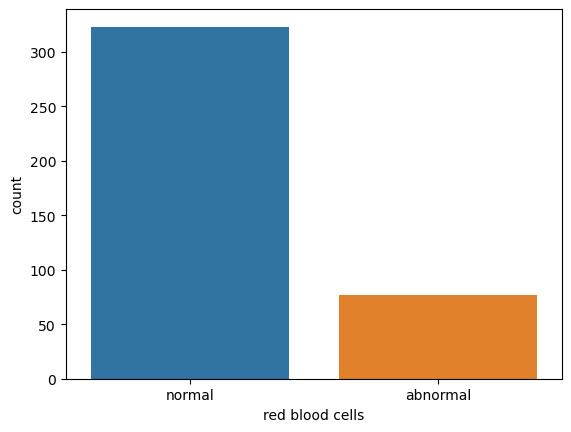

In [269]:
sns.countplot(x='red blood cells', data=kidney)
plt.show()

In [270]:
#filling random values in all categorical columns
def Random_value_Imputation(feature):
    random_sample=kidney[feature].dropna().sample(kidney[feature].isnull().sum())
    random_sample.index=kidney[kidney[feature].isnull()].index
    kidney.loc[kidney[feature].isnull(),feature]=random_sample

In [271]:
Random_value_Imputation(' pus cell')     #only this column because it has higher no. of missing value

In [272]:
kidney.isnull().sum()

age                        0
blood pressure             0
specific gravity           0
albumin                    0
sugar                      0
red blood cells            0
 pus cell                  0
pus cell clumps            4
bacteria                   4
blood glucose random       0
blood urea                 0
serum creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed cell volume         0
white blood cell count     0
red blood cell count       0
ypertension                2
diabetes mellitus          2
coronary artery disease    2
appetite                   1
pedal edema                1
anemia                     1
class                      0
dtype: int64

Those categorical variables who have less no. of missing values then we can replace it with mode

In [274]:
def impute_mode(feature):
    mode=kidney[feature].mode()[0]
    kidney[feature]=kidney[feature].fillna(mode)

In [275]:
for col in cat_col:
    impute_mode(col)

In [276]:
kidney[cat_col].isnull().sum()

red blood cells            0
 pus cell                  0
pus cell clumps            0
bacteria                   0
ypertension                0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [277]:
kidney.isnull().sum()

age                        0
blood pressure             0
specific gravity           0
albumin                    0
sugar                      0
red blood cells            0
 pus cell                  0
pus cell clumps            0
bacteria                   0
blood glucose random       0
blood urea                 0
serum creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed cell volume         0
white blood cell count     0
red blood cell count       0
ypertension                0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

We can see that there is no missing value now

## Performing the Feature Encoding

Machine learning models can only work with numerical values. For this reason, it is necessary to transform the categorical values of the relevant features into numerical ones. This process is called feature encoding.

In [280]:
for col in cat_col:
    print('{} has {} categories'.format(col,kidney[col].nunique()))

red blood cells has 2 categories
 pus cell has 2 categories
pus cell clumps has 2 categories
bacteria has 2 categories
ypertension has 2 categories
diabetes mellitus has 3 categories
coronary artery disease has 2 categories
appetite has 2 categories
pedal edema has 2 categories
anemia has 2 categories
class has 2 categories


## Label Encoding  ---> Because there are less no. of categories in each column

### LabelEncoder can be used to normalize labels. It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels. Fit label encoder.

- normal -- 0
- abnormal --1

In [282]:
 from sklearn.preprocessing import LabelEncoder

In [283]:
le=LabelEncoder()

In [284]:
for col in cat_col:
    kidney[col]=le.fit_transform(kidney[col])

In [285]:
kidney.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,2,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,38.0,6000.0,4.8,0,1,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.8,0,2,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,1,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,1,0,0,0,0,0


## Selecting important features

- **SelectKBest**: Feature selection is a technique where we choose those features in our data that contribute most to the target variable. In other words we choose the best predictors for the target variable. The classes in the sklearn.

- **chi2**: A chi-square (χ2) statistic is a test that measures how a model compares to actual observed data. ... The chi-square statistic compares the size any discrepancies between the expected results and the actual results, given the size of the sample and the number of variables in the relationship.

![image](https://media.geeksforgeeks.org/wp-content/uploads/20190318131202/chi2-form.jpg)

In [287]:
from sklearn.feature_selection import SelectKBest

In [288]:
from sklearn.feature_selection import chi2

In [289]:
ind_col=[col for col in kidney.columns if col!='class']
dep_col='class'

In [290]:
X=kidney[ind_col]
y=kidney[dep_col]

In [291]:
X.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,2,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,11.3,38.0,6000.0,4.8,0,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,4.8,0,2,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,1,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,1,0,0,0,0


In [292]:
imp_features=SelectKBest(score_func=chi2,k=20)

In [293]:
imp_features=imp_features.fit(X,y)

In [294]:
imp_features

SelectKBest(k=20, score_func=<function chi2 at 0x0000025A36D30360>)

In [295]:
imp_features.scores_

array([1.15859940e+02, 8.17867015e+01, 5.03531613e-03, 2.16000000e+02,
       9.48000000e+01, 9.54076367e+00, 1.16254777e+01, 2.52000000e+01,
       1.32000000e+01, 2.24165129e+03, 2.34309714e+03, 3.57792101e+02,
       2.75587488e+01, 2.95133869e+00, 1.23856342e+02, 3.08181415e+02,
       9.70105039e+03, 1.91130252e+01, 8.82000000e+01, 2.04392523e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [296]:
datascore=pd.DataFrame(imp_features.scores_,columns=['Score'])

In [297]:
datascore

,Score
0,115.859940
1,81.786701
2,0.005035
3,216.000000
4,94.800000
5,9.540764
6,11.625478
7,25.200000
8,13.200000
9,2241.651289


In [298]:
X.columns

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', ' pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'ypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia'],
      dtype='object')

In [299]:
dfcols=pd.DataFrame(X.columns)

In [300]:
dfcols

,0
0,age
1,blood pressure
2,specific gravity
3,albumin
4,sugar
5,red blood cells
6,pus cell
7,pus cell clumps
8,bacteria
9,blood glucose random


In [301]:
features_rank=pd.concat([dfcols,datascore],axis=1)
features_rank

,0,Score
0,age,115.859940
1,blood pressure,81.786701
2,specific gravity,0.005035
3,albumin,216.000000
4,sugar,94.800000
5,red blood cells,9.540764
6,pus cell,11.625478
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2241.651289


In [302]:
features_rank.columns=['features','score']

In [303]:
features_rank

,features,score
0,age,115.859940
1,blood pressure,81.786701
2,specific gravity,0.005035
3,albumin,216.000000
4,sugar,94.800000
5,red blood cells,9.540764
6,pus cell,11.625478
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2241.651289


In [304]:
features_rank.nlargest(10,'score')

,features,score
16,white blood cell count,9701.050391
10,blood urea,2343.097145
9,blood glucose random,2241.651289
11,serum creatinine,357.792101
15,packed cell volume,308.181415
3,albumin,216.000000
14,haemoglobin,123.856342
0,age,115.859940
4,sugar,94.800000
18,ypertension,88.200000


In [305]:
selected=features_rank.nlargest(10,'score')['features'].values

In [306]:
selected

array(['white blood cell count', 'blood urea', 'blood glucose random',
       'serum creatinine', 'packed cell volume', 'albumin', 'haemoglobin',
       'age', 'sugar', 'ypertension'], dtype=object)

In [307]:
X_new=kidney[selected]

In [308]:
X_new.head()

,white blood cell count,blood urea,blood glucose random,serum creatinine,packed cell volume,albumin,haemoglobin,age,sugar,ypertension
0,7800.0,36.0,121.0,1.2,44.0,1.0,15.4,48.0,0.0,1
1,6000.0,18.0,121.0,0.8,38.0,4.0,11.3,7.0,0.0,0
2,7500.0,53.0,423.0,1.8,31.0,2.0,9.6,62.0,3.0,0
3,6700.0,56.0,117.0,3.8,32.0,4.0,11.2,48.0,0.0,1
4,7300.0,26.0,106.0,1.4,35.0,2.0,11.6,51.0,0.0,0


In [309]:
len(X_new)

400

In [310]:
X_new.shape

(400, 10)

In [311]:
from sklearn.model_selection import train_test_split

In [312]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,random_state=0,test_size=0.25)

In [313]:
X_train.shape

(300, 10)

In [314]:
y_train.value_counts()    #Checking for imbalancing

class
0    188
1    112
Name: count, dtype: int64

# XGBoost Classifier - For our Model

- XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements Machine Learning algorithms under the Gradient Boosting framework. It provides a parallel tree boosting to solve many data science problems in a fast and accurate way.

![image](https://miro.medium.com/max/1400/1*FLshv-wVDfu-i54OqvZdHg.png)

## Since we are using XGBoost , feature scaling is not required

In [317]:
!pip install xgboost

In [318]:
from xgboost import XGBClassifier

In [319]:
params={'learning-rate':[0,0.5,0.20,0.25],
        'max_depth':[5,8,10],
       'min_child_weight':[1,3,5,7],
       'gamma':[0.0,0.1,0.2,0.4],
       'colsample_bytree':[0.3,0.4,0.7]}

**RandomizedSearchCV** :Randomized search on hyper parameters. RandomizedSearchCV implements a “fit” and a “score” method. It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

![image](https://miro.medium.com/max/1000/1*9W1MrRkHi0YFmBoHi9Y2Ow.png)

In [321]:
from sklearn.model_selection import RandomizedSearchCV

In [322]:
classifier=XGBClassifier()

In [323]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [324]:
random_search = RandomizedSearchCV(
    classifier,
    param_distributions=params,
    n_iter=5,
    scoring='roc_auc',
    n_jobs=1,  # Disable parallelism completely
    cv=5,
    verbose=3
)
from sklearn.model_selection import RandomizedSearchCV
from joblib import parallel_backend

with parallel_backend('threading'):
    random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning-rate=0.25, max_depth=5, min_child_weight=7;, score=0.989 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning-rate=0.25, max_depth=5, min_child_weight=7;, score=0.998 total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning-rate=0.25, max_depth=5, min_child_weight=7;, score=0.992 total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning-rate=0.25, max_depth=5, min_child_weight=7;, score=0.989 total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning-rate=0.25, max_depth=5, min_child_weight=7;, score=0.991 total time=   0.0s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning-rate=0.2, max_depth=10, min_child_weight=7;, score=0.988 total time=   0.0s
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning-rate=0.2, max_depth=10, min_child_weight=7;, score=0.998 total time=   0.0s
[CV 3/5] END colsample_

In [325]:
random_search.best_estimator_    #Checking for best model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning-rate=0.2,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=7, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [326]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 10,
 'learning-rate': 0.2,
 'gamma': 0.1,
 'colsample_bytree': 0.4}

In [327]:
classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='', learning_rate=0.300000012, max_delta_step=0,
              max_depth=5, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [328]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.2, gpu_id=-1,
              grow_policy=None, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=0, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              multi_strategy=None, n_estimators=100, n_jobs=8,
              num_parallel_tree=1, ...)

# Let's Predict our model Accuracy.

In [330]:
y_pred=classifier.predict(X_test)

In [331]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

# Evaluation of the model

In [333]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [334]:
confusion_matrix(y_test,y_pred)

array([[57,  5],
       [ 5, 33]], dtype=int64)

In [335]:
accuracy_score(y_test,y_pred)

0.9

<div class="alert alert-success" markdown="1">

> As we Performed all the Methods and Trained our Model using different Menthods

# We Got Very Good Accuracy Using XGBoost - 98% Accuracy

</div>